## **Regularización Ridge y Lasso**

Como vimos en la práctica de la primera clase -cuando instanciamos distintos modelos de regresión lineal- podíamos emplear atributos polinómicos para aplicar una regresión lineal a un problema no lineal.

Para encontrar la mejor función lineal que se ajuste a nuestros datos, se debe buscar la combinación de $m$ (pendiente) y $b$ (ordenada al origen) que minimiza la `función de costo` -ya profundizaremos sobre ella en la Práctica_03-. Un método para esto, conocido como método de cuadrados mínimos, consiste en minimizar el MSE. de esa forma, se obtienen los mejores parámetros.

Cada vez que agregamos un atributo, estamos agregando una dimensión al problema. En la función de costo, significa un nuevo parámetro a obtener. Procesar los datos de esta manera puede llevar a un overfitting. Cuanto más alto el grado de nuestro polynomial features, más posibilidades de que un polinomio sobreajuste los datos.

Entonces, debemos forzar al modelo para que sea lo más simple posible. Esto hace la **`regularización`**. Y lo hace penalizando, en la función de costo, los parámetros del modelo. Introduce un término que castiga los valores altos para los parámetros del modelo.

Resumiendo:
1. Un modelo muy complejo tiene a sobreajustar los datos
2. Al introducir atributos polinómicos en nuestro dataset y usar regresión lineal, estamos permitiendo modelos muy complejos
3. La regularización penaliza modelos complejos y favorece modelos simples

Una ventaja es que la regularización determina cuáles atributos son relevantes para el modelo y cuáles no. Es una herramienta que no solo sirve para regresión lineal. Se aplica mucho en redes neuronales.

`Regularización L2 o Ridge`

<img src= "../_src/assets/ridge.png">

Se agrega a la función de costo un término proporcional al **cuadrado** del valor de los coeficientes de peso.

Tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo, pero sin que estos lleguen a cero.

El grado de penalización está controlado por el hiperparámetro λ. Cuanto más alto, más regularizado es el modelo.

`Regularización L1 o Lasso`

<img src= "../_src/assets/RSS_lasso.jpg">

Se agrega a la función de costo un término proporcional al **valor absoluto** de los coeficientes de peso.

Tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, Lasso consigue excluir los predictores menos relevantes.

Aquí también el grado de penalización lo controla el hiperparámetro λ. Cuanto más alto, más predictores quedan excluidos.


## Práctica

Vamos a comenzar con un ejemplo controlado. Supongamos que tenemos un dataset con dos atributos, $x$ e $y$, y la relación entre ellos es $y = -1.5x^4+3x^2+1$


In [15]:
import pandas as pd # importa las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
# Generamos nuestros datos

n = 300
x = np.linspace(-1,1,n)
y_real = -1.5*x**4+3*x**2+1
y = y_real + 0.1*np.random.randn(n)

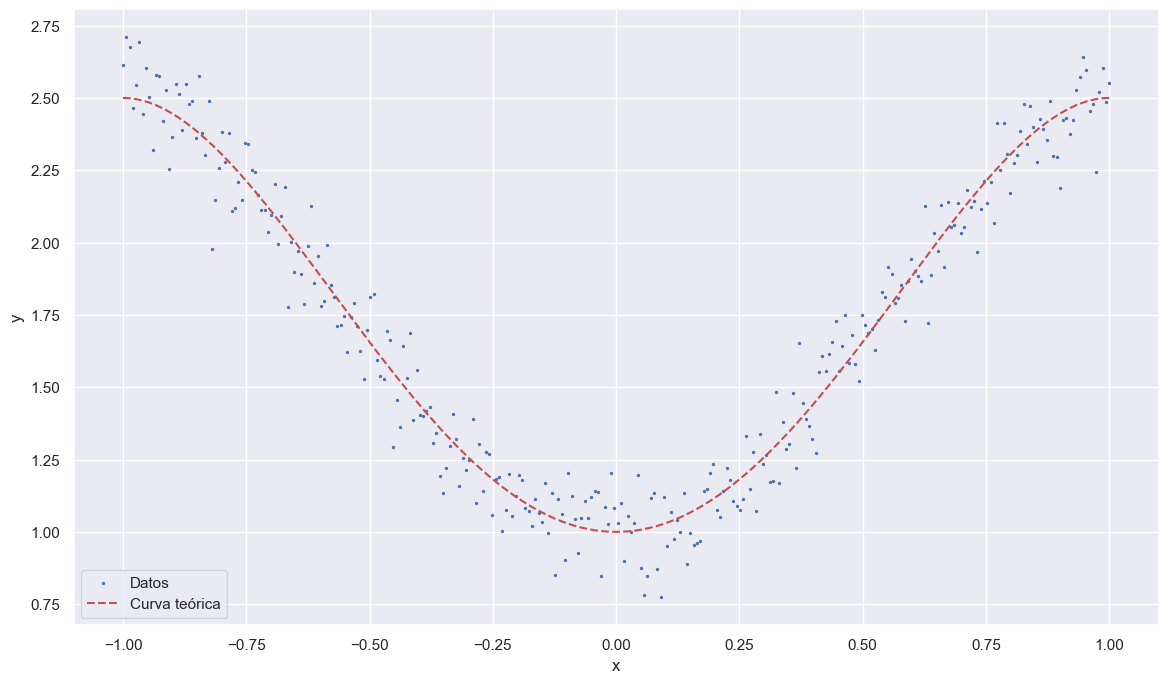

In [18]:
# Ploteamos los datos

plt.figure(figsize = (14,8))
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

# Instanciamos una regresión lineal
reg_1 = LinearRegression()

# Entrenamos
reg_1.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predecimos

y_train_pred_1 = reg_1.predict(X_train)
y_test_pred_1 = reg_1.predict(X_test)

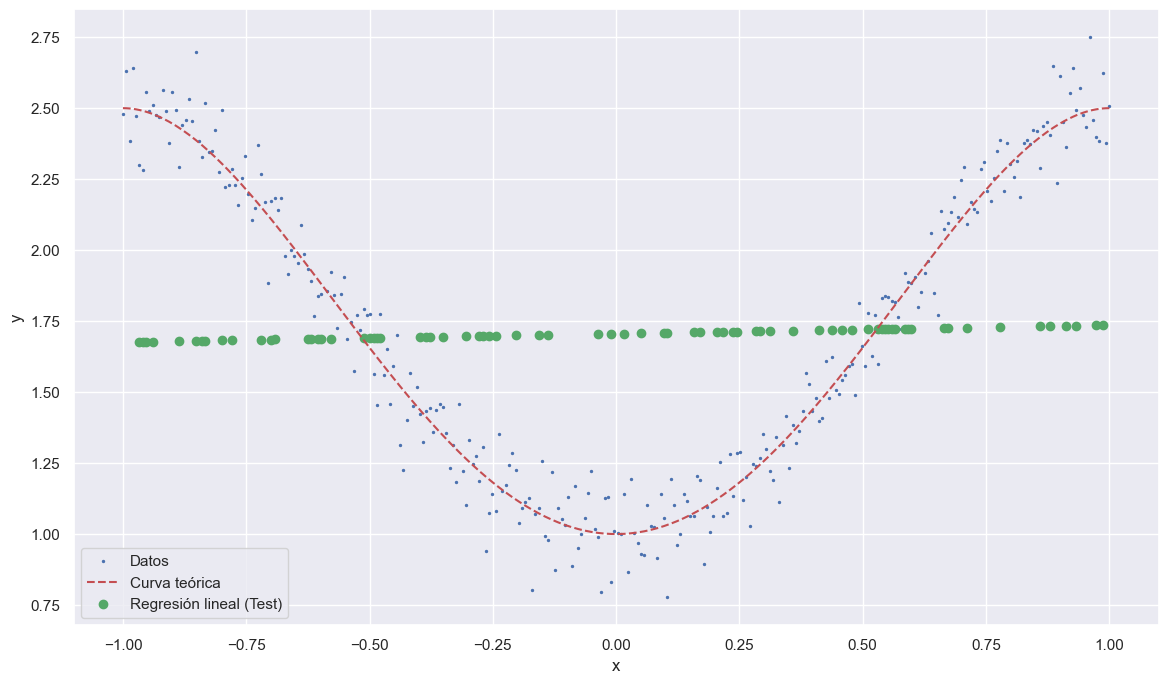

In [8]:
# Graficamos

plt.figure(figsize = (14,8))
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva teórica', c = 'r')
plt.scatter(X_test,y_test_pred_1,label ='Regresión lineal (Test)', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

*Claramente no es un buen modelo, porque los datos no siguen una relación lineal.*

Raíz del error cuadrático medio en Train: 0.5435440521876261
Raíz del error cuadrático medio en Test: 0.5162999982374892


C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\1905891025.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred_1, bins = 20, label = 'Train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\1905891025.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_

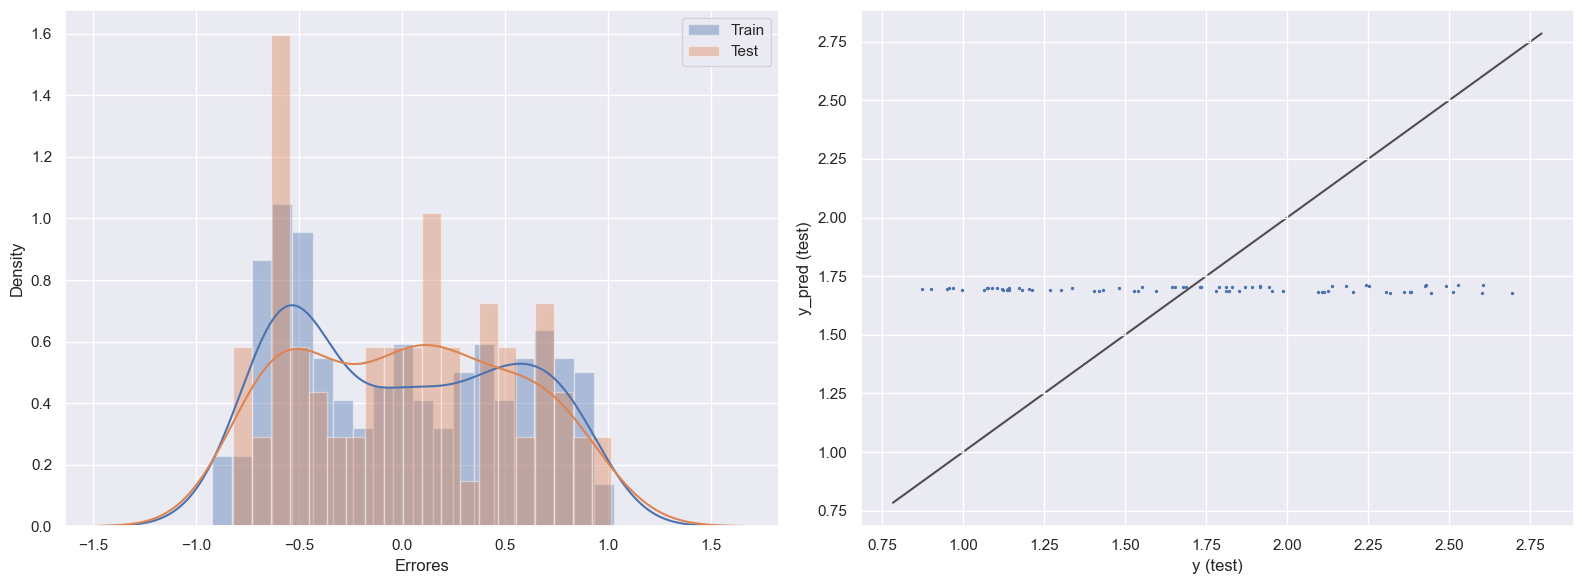

In [22]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_1, bins = 20, label = 'Train')
sns.distplot(y_test - y_test_pred_1, bins = 20, label = 'Test')
plt.xlabel('Errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_1, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]),
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

**Usaremos atributos polinómicos para mejorar el modelado**

In [23]:
# Creamos una función que nos permitirá evaluar nuestros modelos

def evaluar_regresion(model,x,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### Calculamos el error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    
    ### Graficamos
    plt.figure(figsize = (12,4))
    plt.subplot(1,3,1)
    plt.scatter(x,y, s = 2, label = 'Datos')
    plt.plot(x, y_real, '--',label ='Curva teórica', c = 'r')
    
    list1, list2 = zip(*sorted(zip(X_train[:,0], y_train_pred)))
    plt.plot(list1, list2,label ='Regresión (train)')
    
    list1, list2 = zip(*sorted(zip(X_test[:,0], y_test_pred)))
    plt.plot(list1, list2,label = 'Regresión (test)')



    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('Errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

Vamos a agregar al dataset, `X`, nuevos atributos polinómicos: $x^2, x^3$ y $x^4$  y volver a ajustar la regresión lineal. Esto lo haremos ahora de manera manual, pero para eso emplearemos posteriormente polynomial features.

Regresión con atributos polinómicos de grado 1
Agregamos atributos hasta la potencia x**1
Los atributos tienen forma: (300, 1)
Pendientes: [0.01675096]
Ordenada: 1.695206976250333
Raíz del error cuadrático medio en Train: 0.5435440521876261
Raíz del error cuadrático medio en Test: 0.5162999982374892


C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred

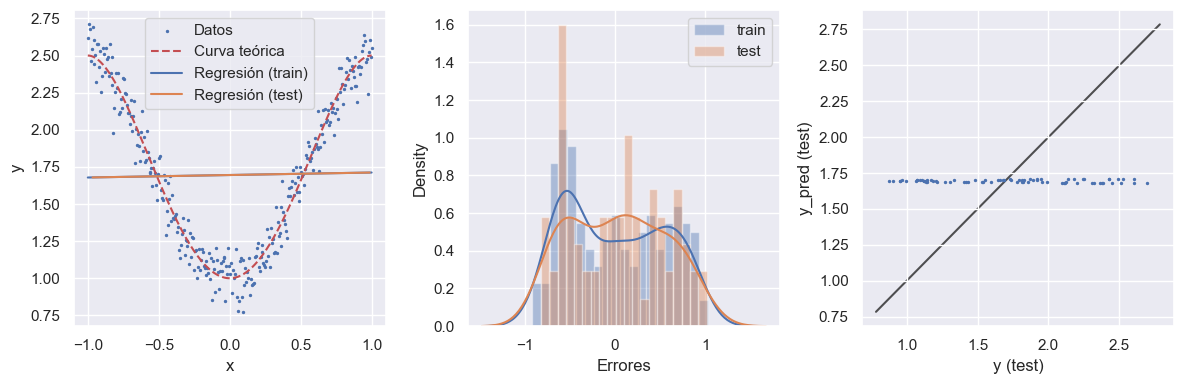

Regresión con atributos polinómicos de grado 2
Agregamos atributos hasta la potencia x**2
Los atributos tienen forma: (300, 2)
Pendientes: [-0.00838306  1.72727346]
Ordenada: 1.11526928690813
Raíz del error cuadrático medio en Train: 0.14480542092997414
Raíz del error cuadrático medio en Test: 0.16384880847684993


C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred

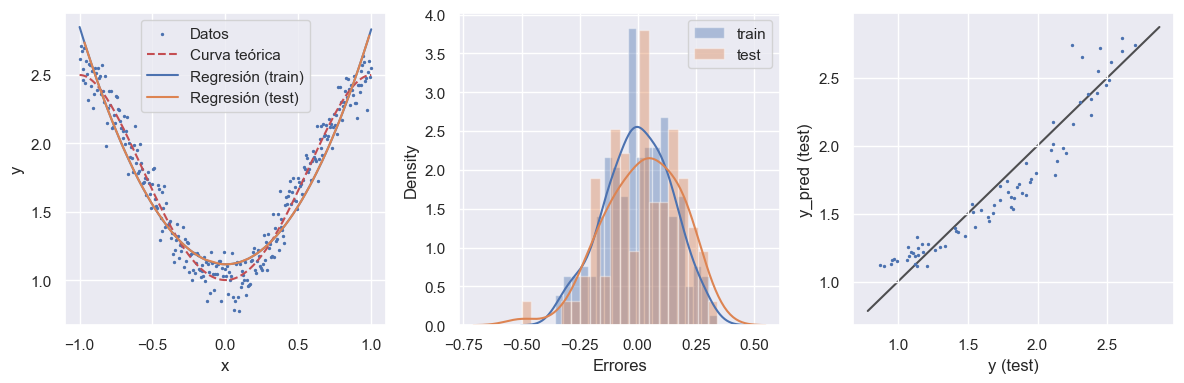

Regresión con atributos polinómicos de grado 3
Agregamos atributos hasta la potencia x**3
Los atributos tienen forma: (300, 3)
Pendientes: [ 0.03645508  1.72728939 -0.07351444]
Ordenada: 1.1155030534123276
Raíz del error cuadrático medio en Train: 0.1443845774728153
Raíz del error cuadrático medio en Test: 0.16315654557104217


C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred

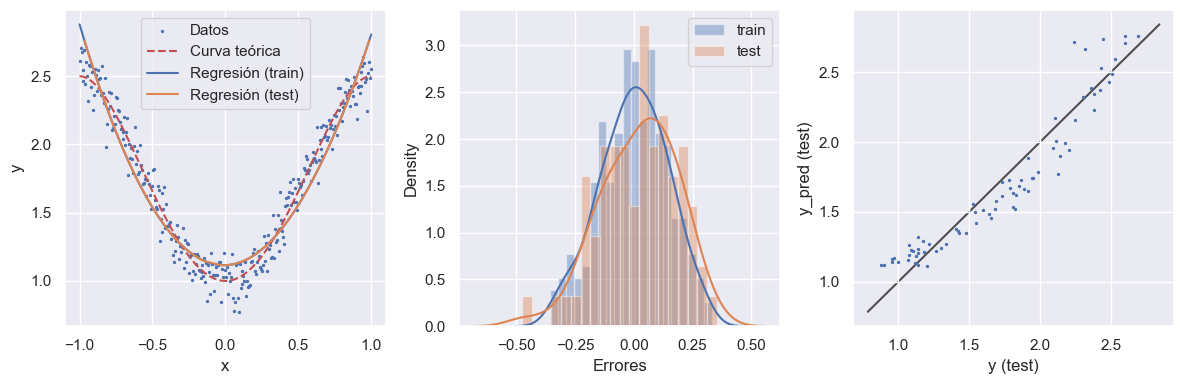

Regresión con atributos polinómicos de grado 4
Agregamos atributos hasta la potencia x**4
Los atributos tienen forma: (300, 4)
Pendientes: [ 0.04177032  2.82703586 -0.08275609 -1.28669173]
Ordenada: 1.0097838720654837
Raíz del error cuadrático medio en Train: 0.10470857535942805
Raíz del error cuadrático medio en Test: 0.10377569089222202


C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred

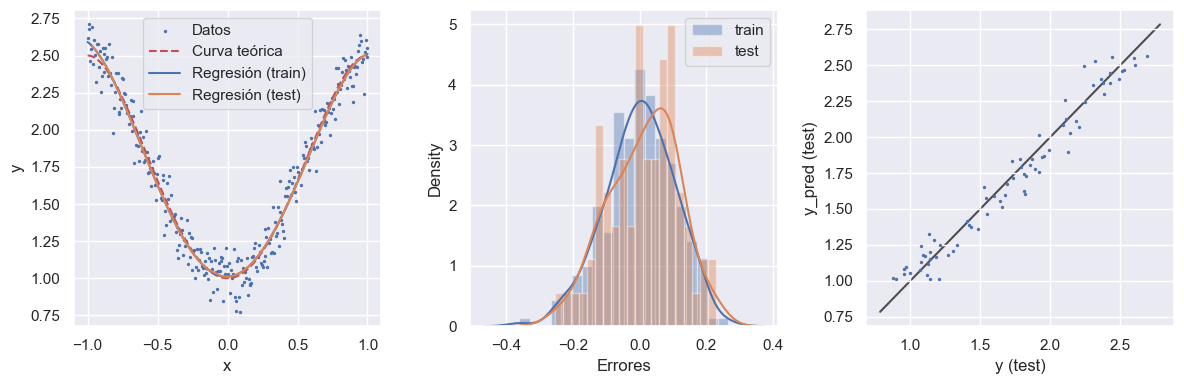

Regresión con atributos polinómicos de grado 5
Agregamos atributos hasta la potencia x**5
Los atributos tienen forma: (300, 5)
Pendientes: [ 0.02690405  2.82704039 -0.01448981 -1.28684434 -0.06096154]
Ordenada: 1.0097559220060126
Raíz del error cuadrático medio en Train: 0.10468066007928124
Raíz del error cuadrático medio en Test: 0.10360602563460501


C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred

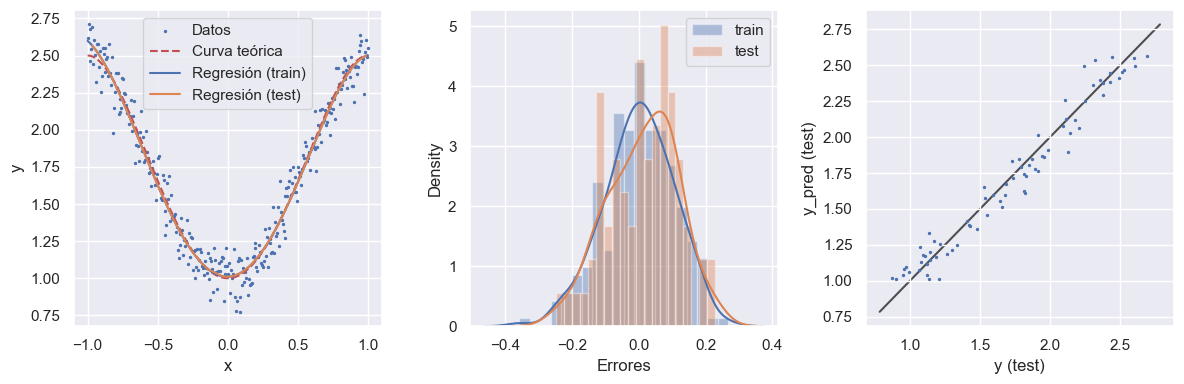

In [24]:
for idx,potencia_maxima in enumerate(range(1,6)):
    print(f'Regresión con atributos polinómicos de grado {idx + 1}')
    print(f'Agregamos atributos hasta la potencia x**{potencia_maxima}')
    
    X = x.reshape(-1,1)
    for potencia in range(2,potencia_maxima+1):
        X = np.hstack((X,(x**potencia).reshape(-1,1)))
    print(f'Los atributos tienen forma: {X.shape}')
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)
    
    ### ENTRENAMOS
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    
    ### COMPLETAR AQUI PARA RESOLVER CHALLENGE
    print(f'Pendientes: {reg.coef_}')
    print(f'Ordenada: {reg.intercept_}')
    
    evaluar_regresion(reg, x,y, X_train, X_test, y_train, y_test)

In [25]:
# Utilizamos polynomial features

from sklearn.preprocessing import PolynomialFeatures

In [26]:
X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [27]:
poly = PolynomialFeatures(7, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape)
print(X_test_new.shape)

(225, 7)
(75, 7)


In [28]:
# Instanciamos una regresión
reg_2 = LinearRegression()

# Entrenamos
reg_2.fit(X_train_new, y_train)

# Observamos sus parámetros
print(reg_2.coef_)
print(reg_2.intercept_)

#Predecimos
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)


[-0.01633273  3.00212776  0.37690322 -1.80011469 -0.90836985  0.37039155
  0.51653378]
1.001593760711899


Raíz del error cuadrático medio en Train: 0.10431089927020783
Raíz del error cuadrático medio en Test: 0.10255596411889703


C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred

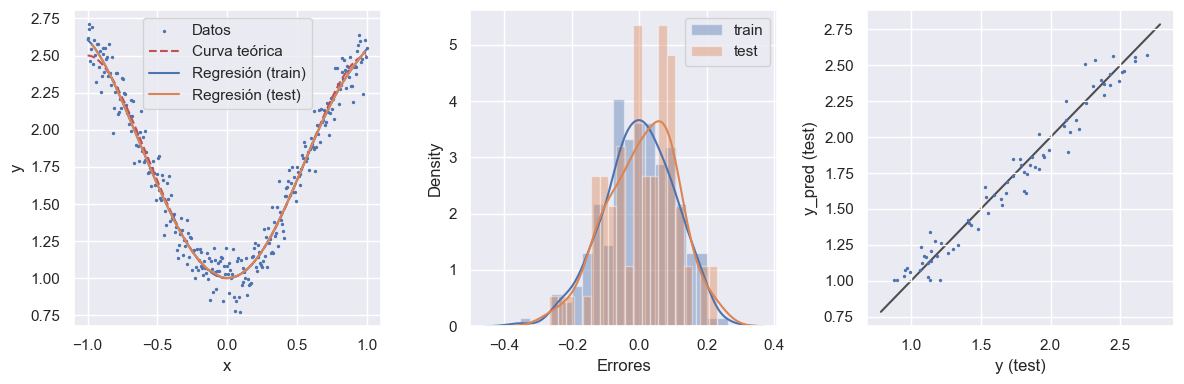

In [29]:
evaluar_regresion(reg_2, x,y, X_train_new, X_test_new, y_train, y_test)

In [30]:
# Regularización Ridge

from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha= 1)
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [ 0.02172423  1.74444176 -0.01867322  0.23474828 -0.02603021 -0.42368643
 -0.02054975]
Ordenada: 1.1240677505071761


Raíz del error cuadrático medio en Train: 0.13049867209001037
Raíz del error cuadrático medio en Test: 0.14499502610113868


C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred

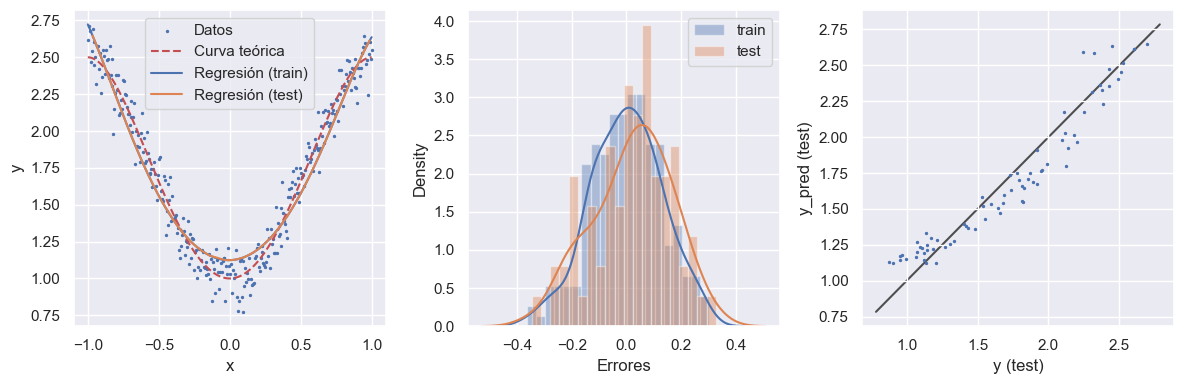

In [31]:
evaluar_regresion(reg_ridge, x,y, X_train_new, X_test_new, y_train, y_test)

In [32]:
# Regularización Lasso

from sklearn.linear_model import Lasso
reg_lasso = Lasso(alpha = 0.0002)
reg_lasso.fit(X_train_new,y_train)

print(reg_lasso.coef_, reg_lasso.intercept_)
y_train_pred_lasso = reg_lasso.predict(X_train_new)
y_test_pred_lasso = reg_lasso.predict(X_test_new)

[ 0.01831429  2.71091368 -0.         -1.05097808 -0.06317645 -0.12298001
 -0.        ] 1.0185384943467861


Raíz del error cuadrático medio en Train: 0.10501703984016586
Raíz del error cuadrático medio en Test: 0.10565501719291964


C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_28812\324442056.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred

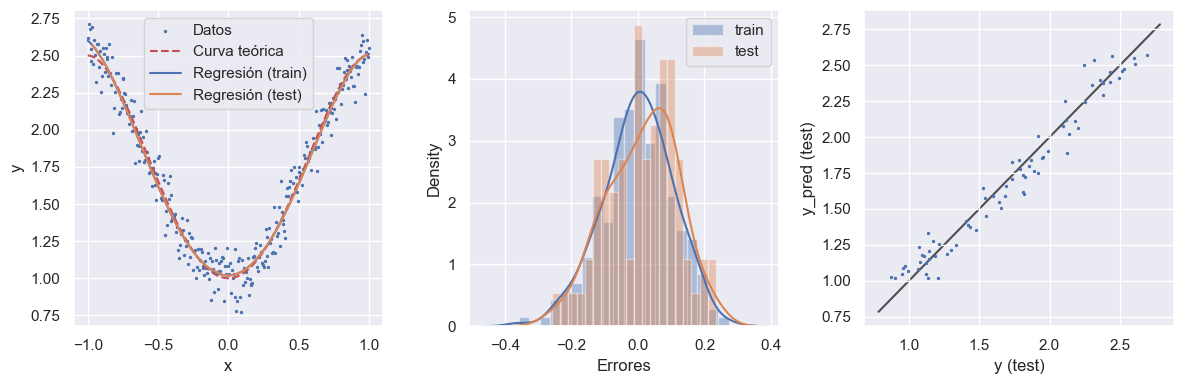

In [33]:
evaluar_regresion(reg_lasso, x,y, X_train_new, X_test_new, y_train, y_test)

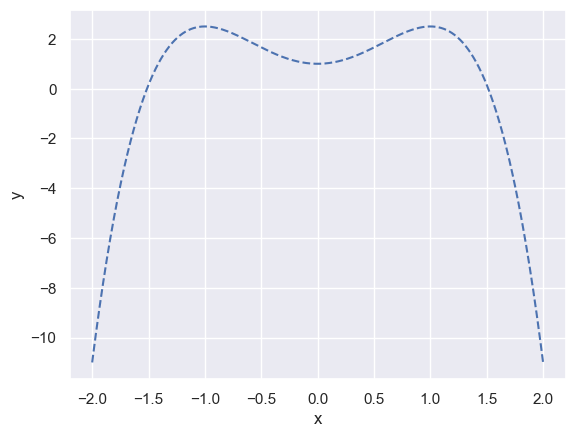

In [34]:
x_nuevo_rango = np.linspace(-2,2,1000)
y_nuevo_rango = -1.5*x_nuevo_rango**4+3*x_nuevo_rango**2+1

plt.plot(x_nuevo_rango, y_nuevo_rango, '--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
X_nuevo_rango = poly.fit_transform(x_nuevo_rango.reshape(-1,1))

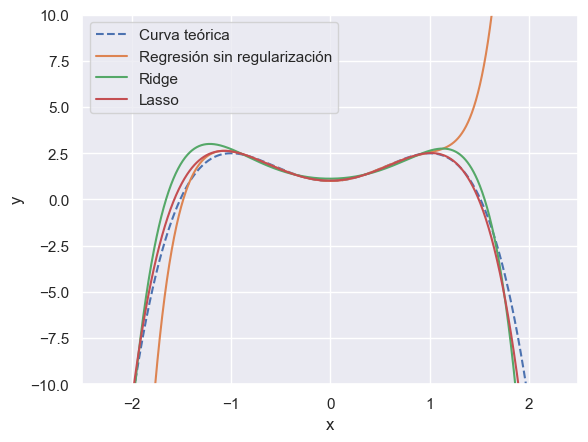

In [36]:
plt.plot(x_nuevo_rango, y_nuevo_rango, '--', label = 'Curva teórica')
plt.plot(x_nuevo_rango, reg_2.predict(X_nuevo_rango), label = 'Regresión sin regularización')
plt.plot(x_nuevo_rango, reg_ridge.predict(X_nuevo_rango), label = 'Ridge')
plt.plot(x_nuevo_rango, reg_lasso.predict(X_nuevo_rango), label = 'Lasso')
plt.legend()

plt.xlim(-2.5,2.5)
plt.ylim(-10,10)

plt.xlabel('x')
plt.ylabel('y')
plt.show()